<a href="https://colab.research.google.com/github/dineshb302/text-classification-finetuning/blob/main/fine-tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install -q pandas
# ! pip install pytorch_lightning


In [5]:
import numpy as np

In [6]:
from torch.utils.data import Dataset
import torch
from transformers import DistilBertTokenizer, AutoTokenizer
from transformers import DistilBertForSequenceClassification, AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split

In [7]:
attributes = ['Rising prices/Inflation', 'Economic uncertainty/slow down','GeoPolitical conflicts/Wars','Volatile stock market',
              'Government Policies/Immigration/Upcoming Presidential elections','High Interest rate','Recession','Increasing unemployment/job market',
              'Personal Finance related/Financial uncertainty/Asset value risk','General anxious/Troubling news','Do not have enough knowledge of finances',
              'Pandemic/Covid related','Economy/GDP/Inflation Improving','Strong Personal finance/Financially secure/Diversified portfolio',
              'Stock market is stable/improving','Generally Optimistic','No_comments','Others'
              ]

In [8]:
checkpoint = "distilbert-base-uncased"
tokenizer = DistilBertTokenizer.from_pretrained(checkpoint)
model = DistilBertForSequenceClassification.from_pretrained(checkpoint, num_labels=len(attributes),
                                                            problem_type="multi_label_classification")

/opt/homebrew/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClas

In [11]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [12]:
device

device(type='mps')

In [13]:
# start

import pandas as pd
data_path = "Dataset for NLP Group Project - Group 13.xlsx"
df = pd.read_excel("Dataset for NLP Group Project - Group 13.xlsx")
df.head()

,Resp ID,Wave,Retail investor category,Q1. How do you feel about the current economic market right now?,"Q1a. Why do you feel ""text mentioned in Q1” about the current economic market right now?",Sum (Number of bucekts classified in),Rising prices/Inflation,Economic uncertainty/slow down,GeoPolitical conflicts/Wars,Volatile stock market,...,Personal Finance related/Financial uncertainty/Asset value risk,General anxious/Troubling news,Do not have enough knowledge of finances,Pandemic/Covid related,Economy/GDP/Inflation Improving,Strong Personal finance/Financially secure/Diversified portfolio,Stock market is stable/improving,Generally Optimistic,No comments/Not sure/Don't know,Others
0,S706RpBoxUfdED3zNqR0fw**,May,Prospect,Somewhat anxious,no comment,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,S706RpBoxUfi93YZa8cqkg**,May,Prospect,A little anxious,Because their will be recession recently accor...,2,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,S706RpBoxUfPMaqrY6ZbKw**,May,Prospect,Somewhat anxious,A lot of unrest and somewhat uncharted territo...,3,NaN,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,S706RpBoxUfSQu3XvtmOhw**,May,Customer,A little anxious,Because the economy is not stable lately,1,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,S706RpBoxUdzwDc3-LF0SA**,May,Customer,A little anxious,Could have war in Europe againl.,1,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.rename(columns={df.columns[3]: "Q1_response", df.columns[4]: "Q1a_response"}, inplace=True)
Q1_text = "How do you feel about the current economic market right now?"
Q1a_text = 'Why do you feel "text mentioned in Q1” about the current economic market right now?'
df.rename(columns={'No comments/Not sure/Don\'t know': 'No_comments'}, inplace=True)

In [15]:
df.isnull().sum()
df.fillna(0, inplace=True)
df.isnull().sum()

Resp ID                                                             0
Wave                                                                0
Retail investor category                                            0
Q1_response                                                         0
Q1a_response                                                        0
Sum (Number of bucekts classified in)                               0
Rising prices/Inflation                                             0
Economic uncertainty/slow down                                      0
GeoPolitical conflicts/Wars                                         0
Volatile stock market                                               0
Government Policies/Immigration/Upcoming Presidential elections     0
High Interest rate                                                  0
Recession                                                           0
Increasing unemployment/job market                                  0
Personal Finance rel

In [16]:
unique_values = {}
for col in df.columns[-18:]:
  unique_values[col] = df[col].unique()

print(unique_values)

for col in df.columns[-18:]:
  df[col] = df[col].replace([' ', '\\'], 0)

unique_values = {}
for col in df.columns[-18:]:
  unique_values[col] = df[col].unique()

print(unique_values)

{'Rising prices/Inflation': array([0, 1, ' ', '\\'], dtype=object), 'Economic uncertainty/slow down': array([0, 1, ' '], dtype=object), 'GeoPolitical conflicts/Wars': array([0, 1, ' '], dtype=object), 'Volatile stock market': array([0, 1, ' '], dtype=object), 'Government Policies/Immigration/Upcoming Presidential elections': array([0, 1, ' '], dtype=object), 'High Interest rate': array([0, 1, ' '], dtype=object), 'Recession': array([0, 1, ' '], dtype=object), 'Increasing unemployment/job market': array([0, 1, ' '], dtype=object), 'Personal Finance related/Financial uncertainty/Asset value risk': array([0, 1, ' '], dtype=object), 'General anxious/Troubling news': array([0, 1, ' '], dtype=object), 'Do not have enough knowledge of finances': array([0, 1, ' '], dtype=object), 'Pandemic/Covid related': array([0, 1, ' '], dtype=object), 'Economy/GDP/Inflation Improving': array([0, 1, ' '], dtype=object), 'Strong Personal finance/Financially secure/Diversified portfolio': array([0, 1, ' '], d

<Axes: >

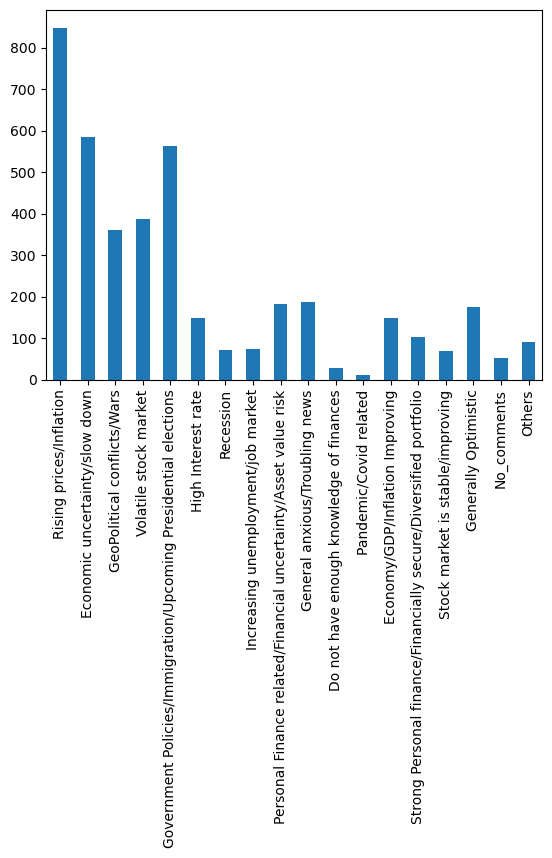

In [17]:
df[attributes].sum().plot.bar()

In [18]:

# Separate features and target
features = df.iloc[:, 4]
target = df.iloc[:, -18:]

# Split the data into train and test sets with equal representation of each class
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Print the number of samples in each class for train and test sets
print("Train set class distribution:")
print(y_train.sum(axis=0))
print("\nTest set class distribution:")
print(y_test.sum(axis=0))


Train set class distribution:
Rising prices/Inflation                                             598
Economic uncertainty/slow down                                      414
GeoPolitical conflicts/Wars                                         248
Volatile stock market                                               268
Government Policies/Immigration/Upcoming Presidential elections     393
High Interest rate                                                  109
Recession                                                            45
Increasing unemployment/job market                                   54
Personal Finance related/Financial uncertainty/Asset value risk     130
General anxious/Troubling news                                      142
Do not have enough knowledge of finances                             22
Pandemic/Covid related                                                8
Economy/GDP/Inflation Improving                                     112
Strong Personal finance/Financiall

In [19]:
# Lets build custom dataset
class CustomDataset(Dataset):
  def __init__(self, texts, labels, tokenizer, max_len=128):
    self.texts = texts
    self.labels = labels
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.texts)

  def __getitem__(self, idx):
    text = str(self.texts[idx])
    label = torch.tensor(self.labels[idx], device=device)

    encoding = self.tokenizer(
            text,
            truncation=True,
            padding="max_length",
            max_length=self.max_len,
            return_tensors='pt'
        )
    encoding = {k: v.to(device) for k, v in encoding.items()}  # Move tensors to device

    return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': label
        }

In [20]:
train_texts = X_train.reset_index(drop=True)
train_labels = y_train.to_numpy(dtype=np.float32)
val_texts = X_test.reset_index(drop=True)
val_labels = y_test.to_numpy(dtype=np.float32)

In [21]:
train_dataset = CustomDataset(train_texts, train_labels, tokenizer)
val_dataset = CustomDataset(val_texts, val_labels, tokenizer)

In [22]:
train_dataset[0]

{'input_ids': tensor([  101, 14200,  1998,  5543,  3291,   102,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,   

In [23]:
# Multi-Label Classification Evaluation Metrics
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score, hamming_loss
from transformers import EvalPrediction
import torch


def multi_labels_metrics(predictions, labels, threshold=0.3):
  sigmoid = torch.nn.Sigmoid()
  probs = sigmoid(torch.Tensor(predictions))

  y_pred = np.zeros(probs.shape)
  y_pred[np.where(probs>=threshold)] = 1
  y_true = labels

  f1 = f1_score(y_true, y_pred, average = 'macro')
  roc_auc = roc_auc_score(y_true, y_pred, average = 'macro')
  hamming = hamming_loss(y_true, y_pred)

  metrics = {
      "roc_auc": roc_auc,
      "hamming_loss": hamming,
      "f1": f1
  }

  return metrics

def compute_metrics(p:EvalPrediction):
  preds = p.predictions[0] if isinstance(p.predictions, tuple) else p.predictions

  result = multi_labels_metrics(predictions=preds,
                                labels=p.label_ids)

  return result

In [24]:
# Training Arguments
from transformers import TrainingArguments, Trainer

args = TrainingArguments(
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    output_dir = './results',
    num_train_epochs=5,
    save_steps=1000,
    save_total_limit=2,
    use_mps_device="true"
)

trainer = Trainer(model=model.to(device),
                  args=args,
                  train_dataset=train_dataset,
                  eval_dataset = val_dataset,
                  compute_metrics=compute_metrics)

In [25]:
args.device

device(type='mps')

In [26]:
trainer.train()


/opt/homebrew/anaconda3/lib/python3.11/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.180000
1000,0.082700


TrainOutput(global_step=1400, training_loss=0.10907321657453264, metrics={'train_runtime': 217.0781, 'train_samples_per_second': 51.594, 'train_steps_per_second': 6.449, 'total_flos': 371014550323200.0, 'train_loss': 0.10907321657453264, 'epoch': 5.0})

In [3]:
# import transformers
# print(transformers.__version__)

4.30.0


In [2]:
# !pip install transformers==4.30.0

  Obtaining dependency information for transformers==4.30.0 from https://files.pythonhosted.org/packages/e2/72/1af3d38e98fdcceb3876de4567ac395a66c26976e259fe2d46266e052d61/transformers-4.30.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 2.3 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for tokenizers!=0.11.3,<0.14,>=0.11.1 from https://files.pythonhosted.org/packages/0c/e0/f51b2d52fcc2c64e0b81da0a1c68d57b3859212143dbc64b0d175ed78693/tokenizers-0.13.3-cp311-cp311-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 6.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 8.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.42.0.dev0
    Unin

In [27]:
trainer.evaluate()


{'eval_loss': 0.09562999755144119,
 'eval_roc_auc': 0.7797761740792175,
 'eval_hamming_loss': 0.0349537037037037,
 'eval_f1': 0.58662996647123,
 'eval_runtime': 5.3526,
 'eval_samples_per_second': 179.352,
 'eval_steps_per_second': 22.419,
 'epoch': 5.0}

In [28]:
trainer.save_model("distilbert-finetuned-imdb-multi-label")


In [54]:
text = "Due to COVID-19 and various other disaster's, I feel the economy has been on a steady decline and am worried we may be headed for another recession."

encoding = tokenizer(text, return_tensors='pt')
encoding.to(trainer.model.device)

outputs = trainer.model(**encoding)

In [55]:
sigmoid = torch.nn.Sigmoid()
probs = sigmoid(outputs.logits[0].cpu())
preds = np.zeros(probs.shape)
preds[np.where(probs>=0.3)] = 1

In [56]:
preds

array([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [57]:
true_labels = [attributes[i] for i in range(len(preds)) if preds[i] == 1.0]

print(true_labels)

['Economic uncertainty/slow down', 'Recession']
